In [14]:
import spotipy
import spotipy.util as util
import pandas as pd 
import csv 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

token = util.prompt_for_user_token(
        username="1216881844",
        scope='playlist-modify-public',
        client_id="e140e3727440411da49853bba10435b6",
        client_secret="3cad2acf3ec64226aa56928372effd1f",
        redirect_uri="http://localhost:8888") 

sp = spotipy.Spotify(auth=token) 

In [3]:
# File to Load
file_to_load = "top2018.csv"
# Read File and store into Pandas data frame
top100_df = pd.read_csv(file_to_load)
top100_df
 



,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.033200,0.000083,0.5520,0.3570,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.258000,0.003720,0.1230,0.4730,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.117000,0.000066,0.1310,0.1400,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.580000,0.000000,0.1120,0.4390,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.058900,0.000060,0.3960,0.3500,91.030,217925.0,4.0
5,7dt6x5M1jzdTEt8oCbisT,Better Now,Post Malone,0.680,0.563,10.0,-5.843,1.0,0.0454,0.354000,0.000000,0.1360,0.3740,145.028,231267.0,4.0
6,58q2HKrzhC3ozto2nDdN4,I Like It,Cardi B,0.816,0.726,5.0,-3.998,0.0,0.1290,0.099000,0.000000,0.3720,0.6500,136.048,253390.0,4.0
7,7ef4DlsgrMEH11cDZd32M,One Kiss (with Dua Lipa),Calvin Harris,0.791,0.862,9.0,-3.240,0.0,0.1100,0.037000,0.000022,0.0814,0.5920,123.994,214847.0,4.0
8,76cy1WJvNGJTj78UqeA5z,IDGAF,Dua Lipa,0.836,0.544,7.0,-5.975,1.0,0.0943,0.040300,0.000000,0.0824,0.5100,97.028,217947.0,4.0
9,08bNPGLD8AhKpnnERrAc6,FRIENDS,Marshmello,0.626,0.880,9.0,-2.384,0.0,0.0504,0.205000,0.000000,0.1280,0.5340,95.079,202621.0,4.0


C:\Users\kramsey\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


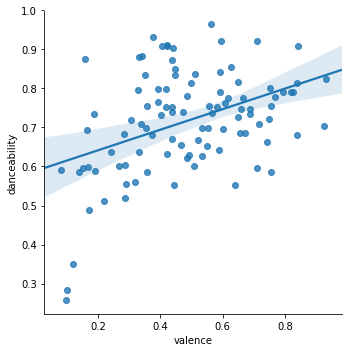

In [4]:
sns.lmplot(x='valence',y='danceability',data=top100_df,fit_reg=True) 
# Save the figure
plt.savefig("Danceability_vs_Valence.png") 

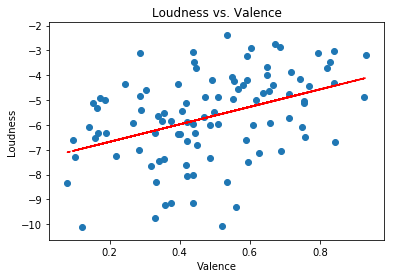

<Figure size 432x288 with 0 Axes>

In [5]:
# Build a scatter plot for each data type
plt.scatter(top100_df["valence"], top100_df["loudness"], color= "purple", marker="o", s=12)

# Incorporate the other graph properties
plt.title("Loudness vs. Valence")
plt.ylabel("Loudness")
plt.xlabel("Valence")
plt.grid(False) 
x = top100_df['valence']
y = top100_df['loudness']
plt.scatter(x, y)
# calc the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show() 
plt.savefig('Loudness_vs_Valence.png') 

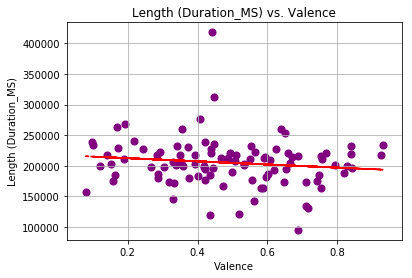

<Figure size 432x288 with 0 Axes>

In [6]:
# Build a scatter plot for each data type
#plt.scatter(top100_df["valence"], top100_df["duration_ms"], color= "blue", marker="o", s=10)

# Incorporate the other graph properties
plt.title("Length (Duration_MS) vs. Valence")
plt.ylabel("Length (Duration_MS)")
plt.xlabel("Valence")
plt.grid(True)  
x = top100_df['valence']
y = top100_df['duration_ms']
plt.scatter(x, y, color="purple", marker="o", s=50)
# calc the trendline
z = np.polyfit(x, y, 1) 
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show() 
plt.savefig('Length_vs_Valence.png')


In [12]:
top100_df.loc[top100_df['valence'].idxmax()] 

id                  7qiZfU4dY1lWllzX7mPBI
name                         Shape of You
artists                        Ed Sheeran
danceability                        0.825
energy                              0.652
key                                     1
loudness                           -3.183
mode                                    0
speechiness                        0.0802
acousticness                        0.581
instrumentalness                        0
liveness                           0.0931
valence                             0.931
tempo                              95.977
duration_ms                        233713
time_signature                          4
Name: 25, dtype: object

In [13]:
top100_df.loc[top100_df['valence'].idxmin()] 

id                  63SevszngYpZOwf63o61K
name                            Nevermind
artists                      Dennis Lloyd
danceability                        0.592
energy                              0.691
key                                     3
loudness                           -8.354
mode                                    1
speechiness                         0.196
acousticness                        0.156
instrumentalness                 9.78e-06
liveness                            0.418
valence                            0.0796
tempo                              99.976
duration_ms                        156600
time_signature                          4
Name: 33, dtype: object